In [2]:
!pip -q install jcopml

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

# Import Data

In [8]:
df = pd.read_csv('/kaggle/input/irisdataset/iris.csv', index_col='Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


# EDA

## Setiap Kllasifikasi Selalu perhatikan balance class

In [15]:
import seaborn as sns

<Axes: xlabel='Species', ylabel='count'>

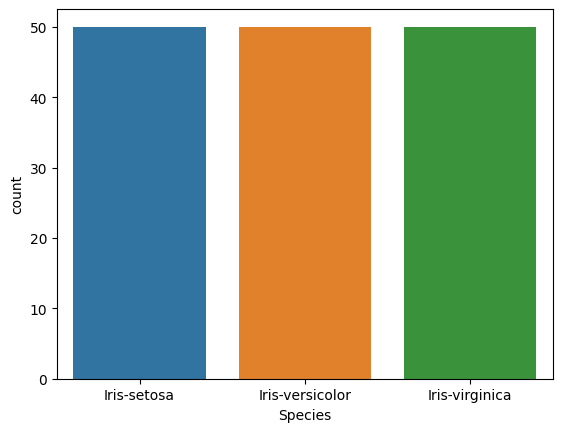

In [16]:
sns.countplot(data=df, x='Species')

In [17]:
import matplotlib.pyplot as plt

In [18]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

## Feature vs Target

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

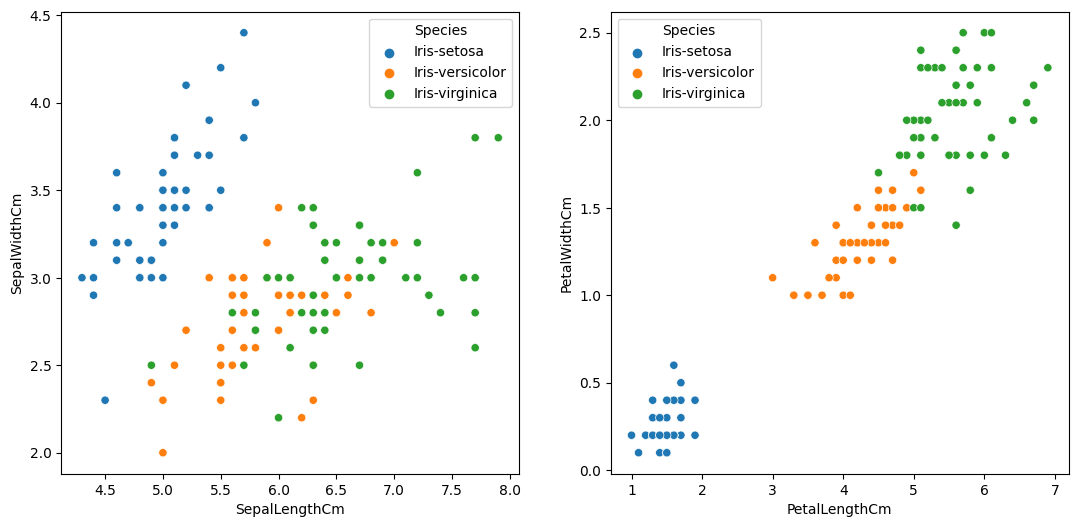

In [22]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
sns.scatterplot(data=df, x="SepalLengthCm", y='SepalWidthCm', hue='Species')
plt.subplot(122)
sns.scatterplot(data=df, x="PetalLengthCm", y='PetalWidthCm', hue='Species')

# Dataset Splitting

In [23]:
X = df.drop(columns='Species')
y = df.Species

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, X_train.shape, y_train.shape

((120, 4), (30, 4), (120, 4), (120,))

# Training

In [27]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

## One vs Rest / One vs All

In [39]:
# Preprocessor
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), X_train.columns)
])

# Pipeline
lr_pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(multi_class='ovr', penalty='l2', solver='lbfgs', n_jobs=-1, random_state=42)) # penalty/regularization = l2 (agar tidak terlalu sakit untuk regularization-nya) dan solver digunakan sebagai optimizer
])
    
# Parameter Tunning
model = GridSearchCV(lr_pipeline, gsp.logreg_params, cv=4, n_jobs=-1, verbose=1) # karena data kecil, maka dapat menambahkan jumlah fold
model.fit(X_train, y_train)

# Evaluation
print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 4 folds for each of 14 candidates, totalling 56 fits
{'algo__C': 10.0, 'algo__fit_intercept': True}
0.9583333333333334 0.9583333333333334 0.9666666666666667


## One vs One
One vs One `jarang digunakan` karena membutuhkan komputasi yang besar, bahkan `scikit-learn` pun `tidak menyediakan`

## Multinomial

In [40]:
# Preprocessor
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), X_train.columns)
])

# Pipeline
lr_pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(multi_class='multinomial', penalty='l2', solver='lbfgs', n_jobs=-1, random_state=42)) # penalty/regularization = l2 (agar tidak terlalu sakit untuk regularization-nya) dan solver digunakan sebagai optimizer
])
    
# Parameter Tunning
model = GridSearchCV(lr_pipeline, gsp.logreg_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

# Evaluation
print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 14 candidates, totalling 42 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'algo__C': 10.0, 'algo__fit_intercept': True}
0.9833333333333333 0.9666666666666667 1.0


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
